# <font color='navy'> <b> VN kondenzátora </b></font>

## <font color='teal'> <b> Príklad 5. Simulácia VN kondenzátora s využitím FreeCAD </b></font>


Pri konštrukcii vysoko-napäťových zariadení je potrebné zabrániť vzniku koróny na miestach, kde je vysoká intenzita elektrického poľa. Jedno z možných riešení ukazuje nasledujúci príklad - ostrú hranu "zabalíme" do miesta s nízkou intenzitou elektrického poľa.

### <font color='purple'> <b> Vytvorenie náčrtu v FreeCad Sketcher </b></font>

Sketcher zjednodušuje kreslenie, princíp je založený na vzájomnom kotvení komponentov pomocou rôznych druhov obmedzení tak, aby vo výsledku bol vytvorený náčrt "pevný". 


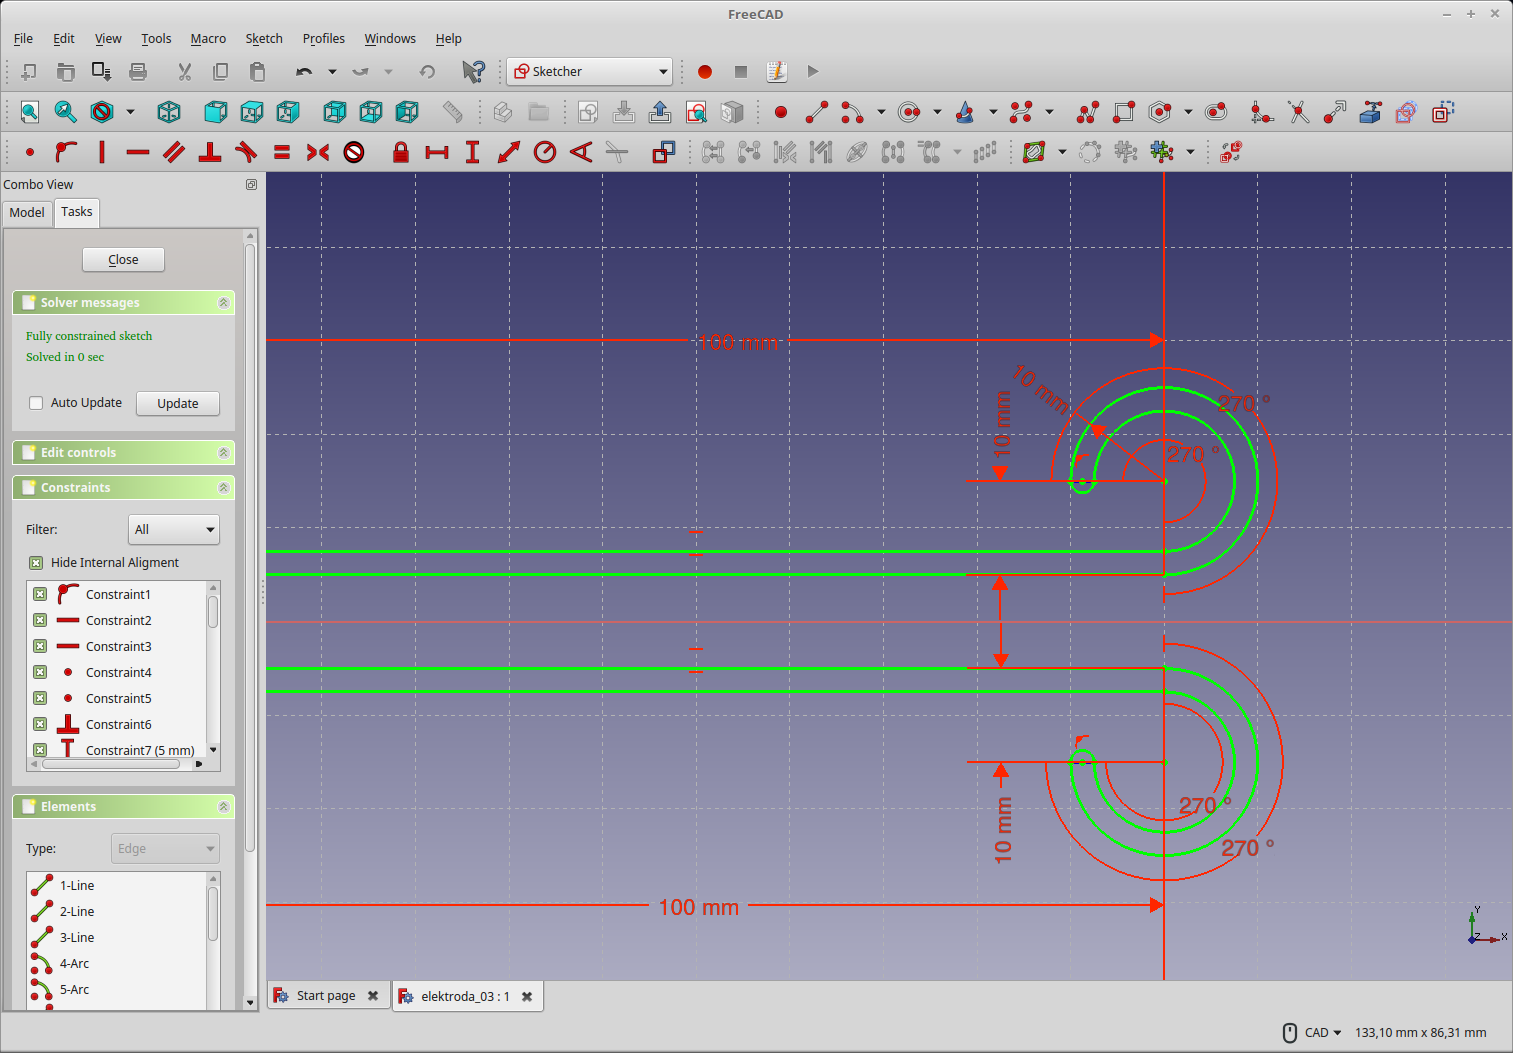

In [2]:
from IPython.display import Image
Image(filename='./img/fc_03.png', width=650)

### <font color='purple'> <b> FreeCAD PartDesigner </b></font>

Náčrt môžeme ďalej upravovať, v našom prípade ho vyexportujeme vo formáte *\*.brep* pre daľšie spracovanie v *gmsh*. Simulácia kondenzátora bude v 2D a rotačnej symetrii.


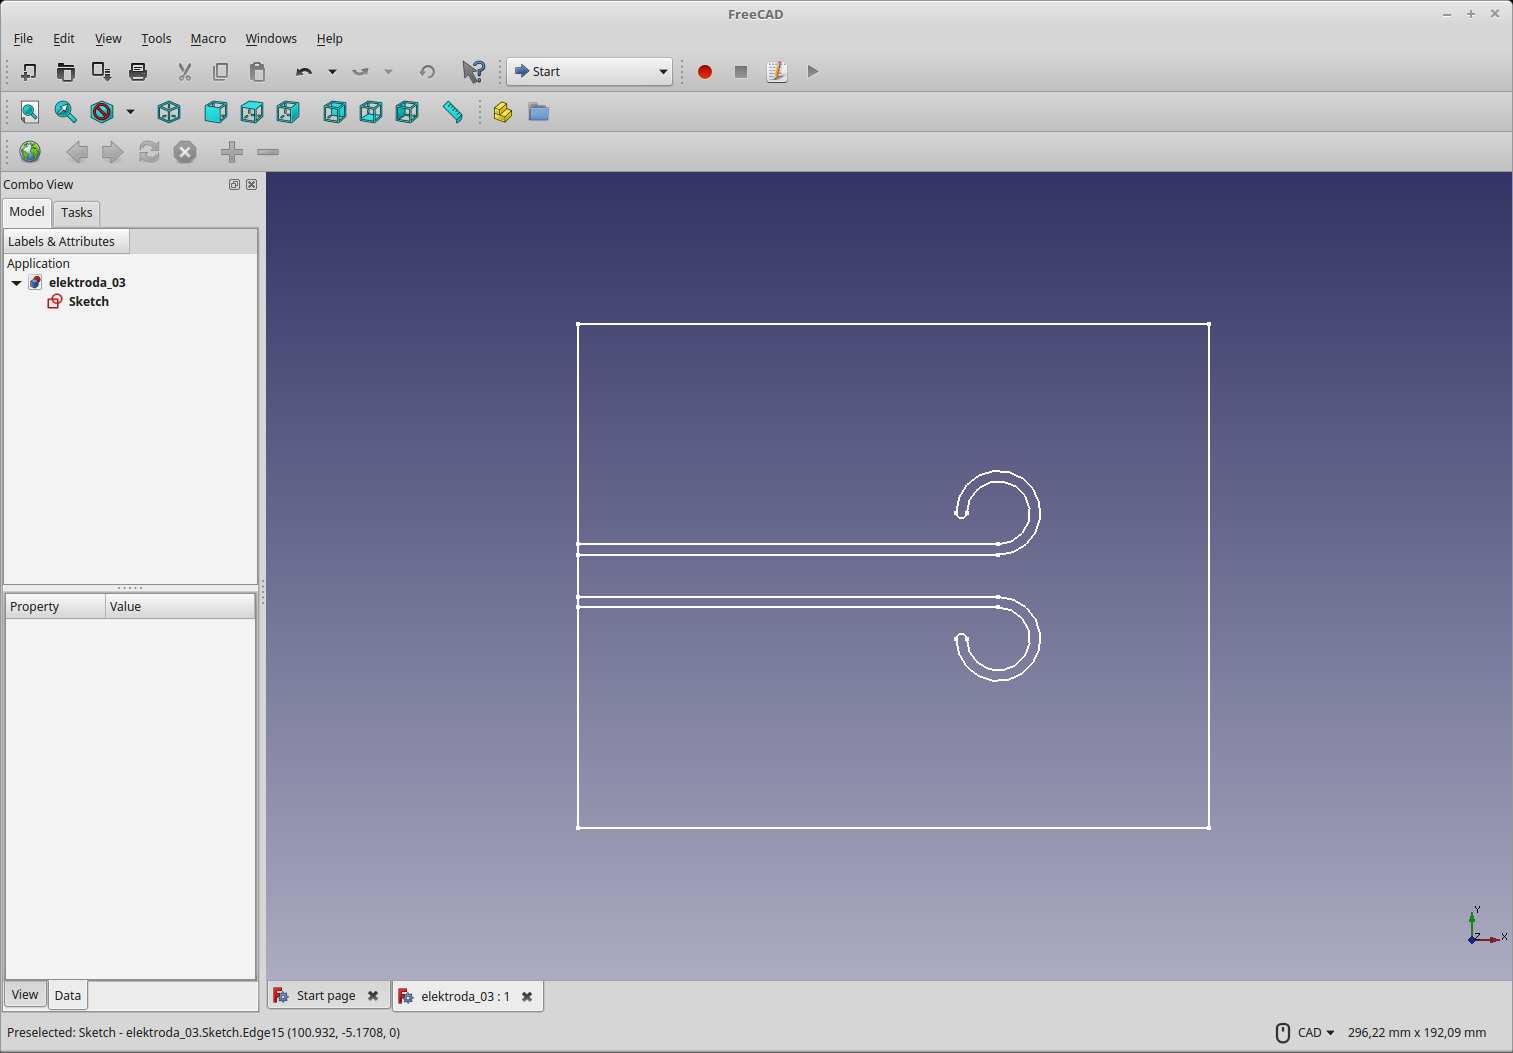

In [2]:
Image(filename='./img/fc_04.png', width=650)

### <font color='purple'> <b> Vytvorenie siete </b></font>

Súbor *\*.brep* obsahuje len logické entity, pre korektne generovanie siete musíme definovať fyzické entity. Skript pre **gmsh** *\*.geo* má potom tvar

    Merge "elektroda_03.brep";
    Physical Line("e1") = {2,3,4,5,6};         ! cisla segmentov ciar v subore brep
    Physical Line("e2") = {12,13,14,15,16};
    Physical Line("ex") = {7,8,9,10,11,18};

    Line Loop(1) = {2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18};
    Plane Surface(2) = {1};
    Physical Surface("air") = {2};

Vytvorená sieť je potom len na fyzickej ploche ohranicenej elektródami.


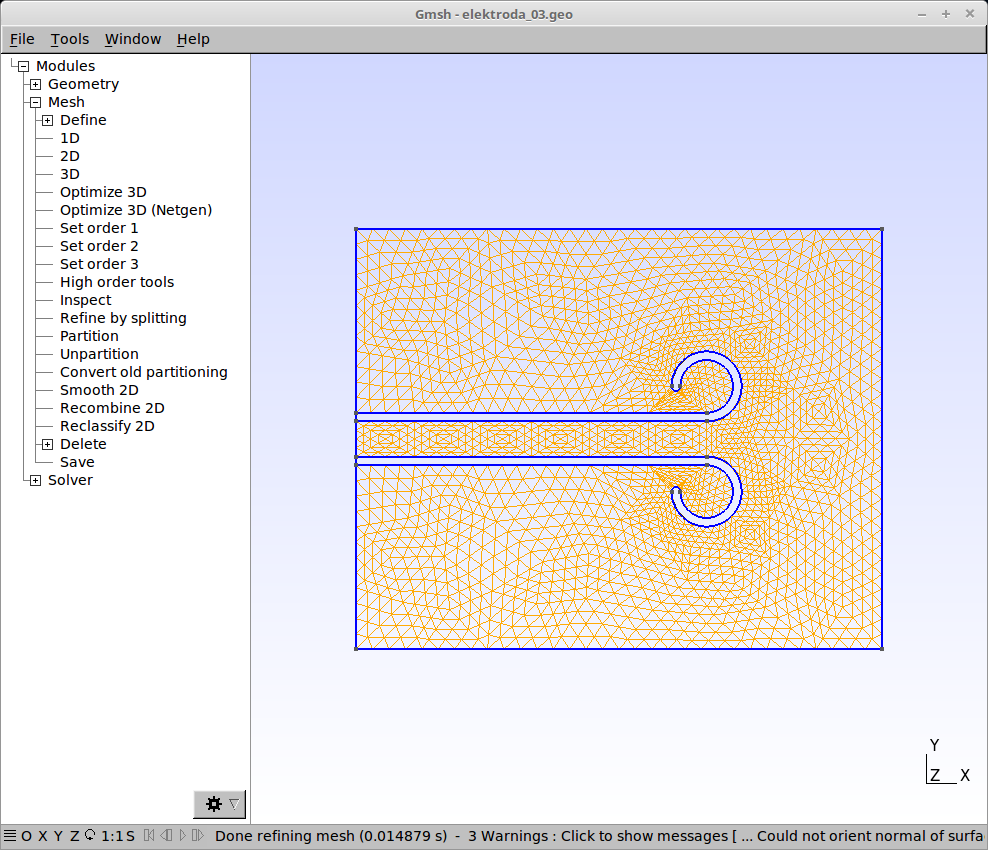

In [3]:
Image(filename='./img/gmsh_04.png', width=650)

## Simulácia v Elmer

V povelovom súbre simulátora *\*.sif* musíme deklarovať, že riešenie problému bude v rotačnej symetrii

    Simulation
      Coordinate System = Axi Symmetric
      ...
    End
    
Ostatné časti súboru sú rovnaké ako v prípade rovinného kondenzátora.


## Post-procesing

Ak chceme znázorniť polia spolu s fyzickým objektom, vygenerujeme si vo FreeCAD-e 3D objekt, exportujeme ho do *gmsh*, kde si vytvoríme sieť na povrchu objektu a exportujeme ho do formátu *\*.vtu*.


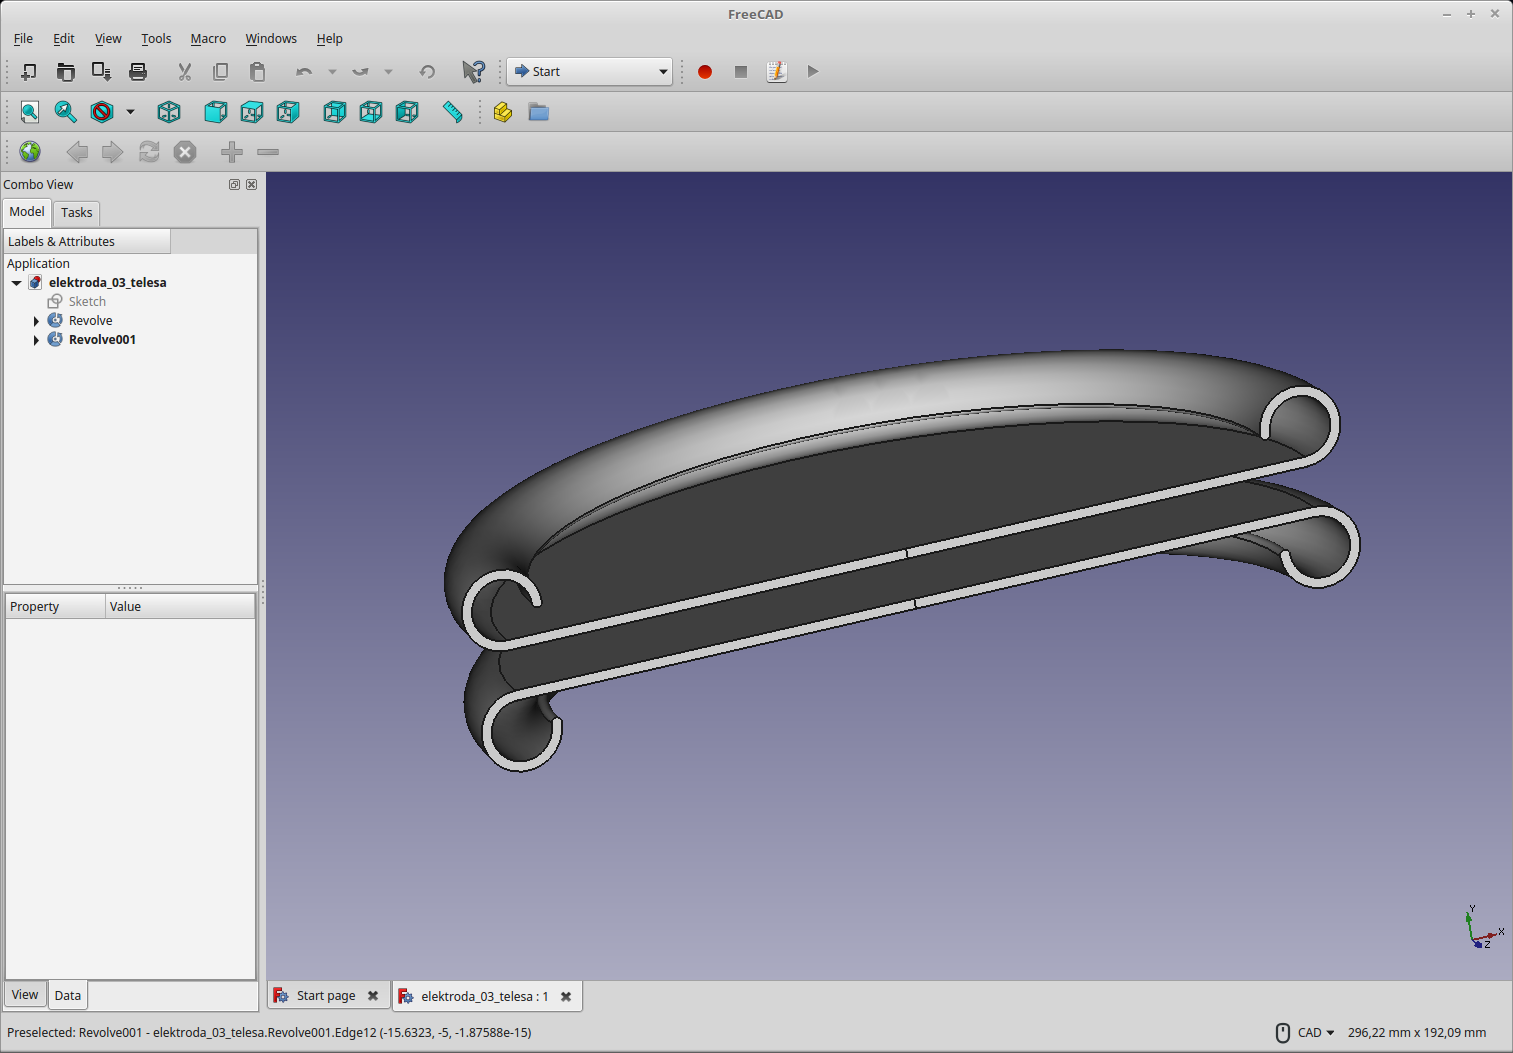

In [4]:
Image(filename='./img/fc_05.png', width=650)

V programe *ParaView* importujeme výsledok simulácie ako aj 3D vygenerovaný objekt. Na znázornenie potenciálových hladín ako aj elektrických siločiar nám stačia len základné filtre programu. Zo simulácie je zrejmé, že na krajoch elektród nie je zvýšená intenzita elektrického poľa a ostrá hrana sa nachádza v mieste s nizkou intenzitou.


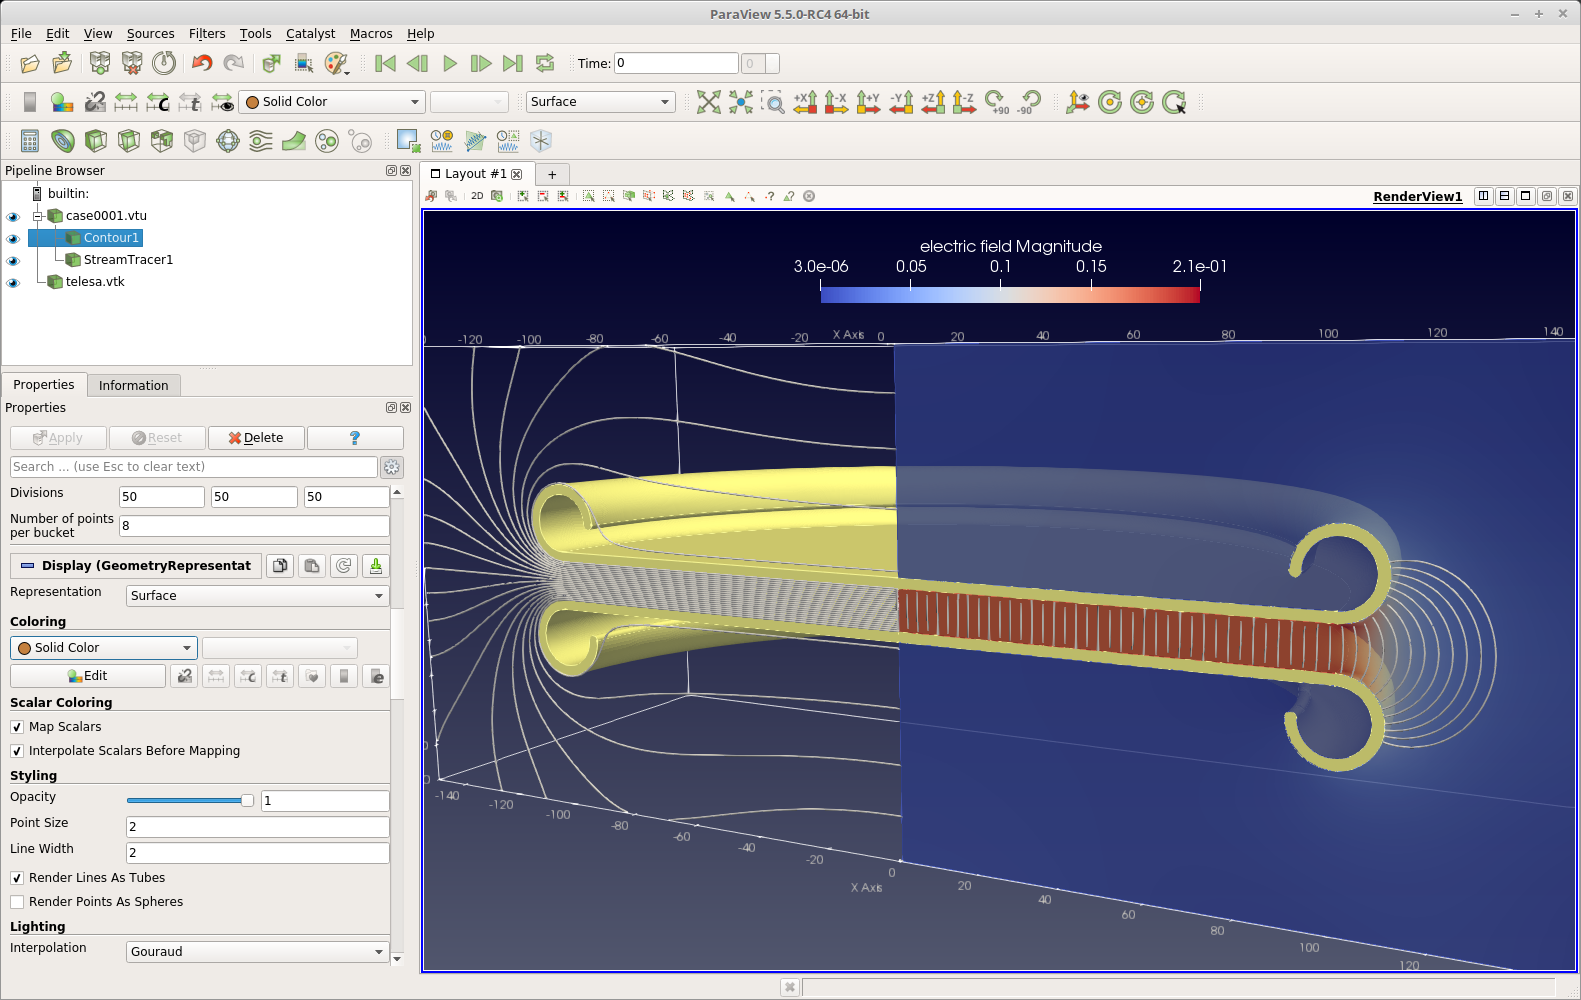

In [3]:
Image(filename='./img/pw_02.png', width=950)